<a href="https://colab.research.google.com/github/bulutciftci/aygaz_ai_bootcamp/blob/main/project_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kütüphanelerin Eklenmesi

In [20]:
# Gerekli kütüphaneleri import edildi
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
tf.config.run_functions_eagerly(True)

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc


import warnings
warnings.filterwarnings("ignore")

import keras
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


Veri Setinin Yüklenmesi ve Verilerin Bölünmesi

In [21]:
cifar=tf.keras.datasets.cifar10 #cifar10 veri setini kerastan çekildi

(X_train,y_train),(X_test,y_test) = cifar.load_data() #veri seti yüklenip train ve test olarak ayırıldı

Eğitim Veri Setinin Boyutlarının Yazdırılması

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
y_train.shape

(50000, 1)

In [24]:
X_test.shape

(10000, 32, 32, 3)

In [25]:
y_test.shape

(10000, 1)

**Veri Setinin Görselleştirilmesi**

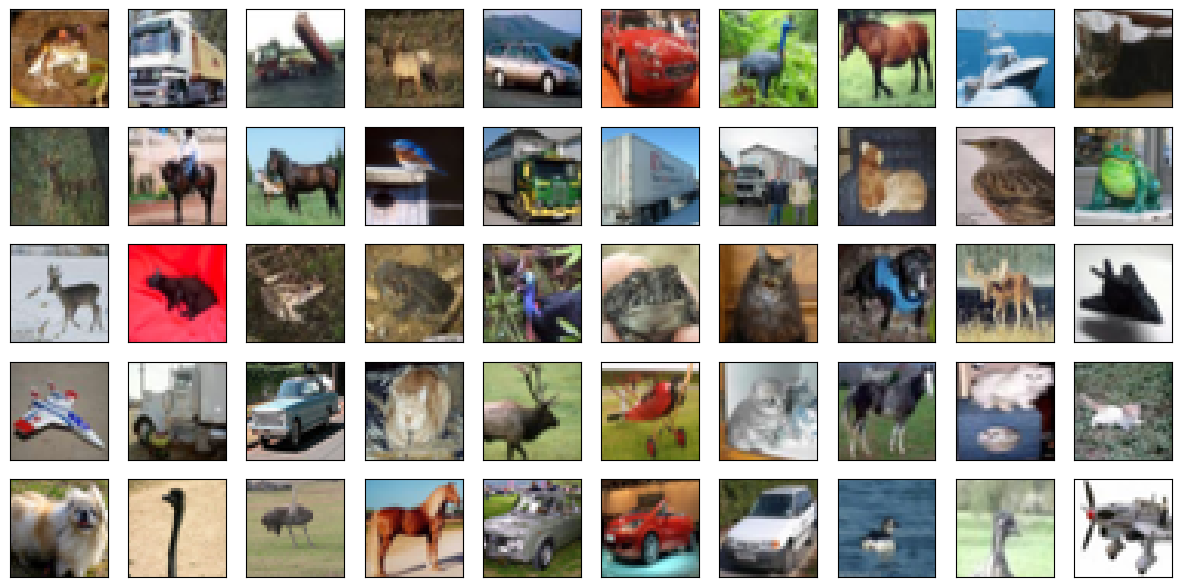

In [26]:
plt.figure(figsize=(15,15)) #grafik boyutlandırma yapıldı

for i in range(50): #50 adet veri görselleştirildi
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

**Verileri Normalize Etme**

In [27]:
#Veriler normalize edildi
X_train = X_train / 255.0

X_test = X_test / 255.0



**Makine Öğrenmesi Modeli Oluşturma**

In [41]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical



# Etiketleri One-Hot Encode Etme
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

# Model oluşturma
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 veri setinde 10 sınıf olduğu için çıktı katmanındaki düğüm sayısını 10 olarak ayarlandı
])

# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])

# Modeli eğitme
hist = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=15)


Epoch 1/15
1563/1563 [==============================] - 131s 82ms/step - loss: 1.6112 - accuracy: 0.4097 - precision_2: 0.6589 - recall_2: 0.1702 - f1_score: 0.4026 - val_loss: 1.2593 - val_accuracy: 0.5473 - val_precision_2: 0.7673 - val_recall_2: 0.3245 - val_f1_score: 0.5358
Epoch 2/15
1563/1563 [==============================] - 137s 88ms/step - loss: 1.2119 - accuracy: 0.5702 - precision_2: 0.7485 - recall_2: 0.3792 - f1_score: 0.5657 - val_loss: 0.9972 - val_accuracy: 0.6500 - val_precision_2: 0.8097 - val_recall_2: 0.4863 - val_f1_score: 0.6448
Epoch 3/15
1563/1563 [==============================] - 122s 78ms/step - loss: 1.0384 - accuracy: 0.6386 - precision_2: 0.7812 - recall_2: 0.4857 - f1_score: 0.6359 - val_loss: 0.9111 - val_accuracy: 0.6778 - val_precision_2: 0.8096 - val_recall_2: 0.5512 - val_f1_score: 0.6698
Epoch 4/15
1563/1563 [==============================] - 122s 78ms/step - loss: 0.9386 - accuracy: 0.6733 - precision_2: 0.8017 - recall_2: 0.5438 - f1_score: 0.671

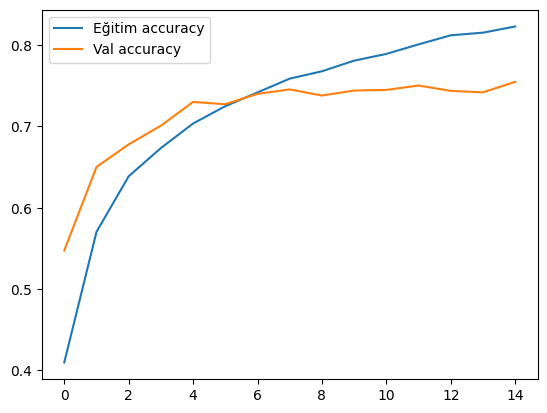

In [56]:
#Test ve Validation doğrulukları görselleştirildi
plt.figure()
plt.plot(hist.history["accuracy"], label="Eğitim accuracy")
plt.plot(hist.history["val_accuracy"], label="Val accuracy")
plt.legend()
plt.show()

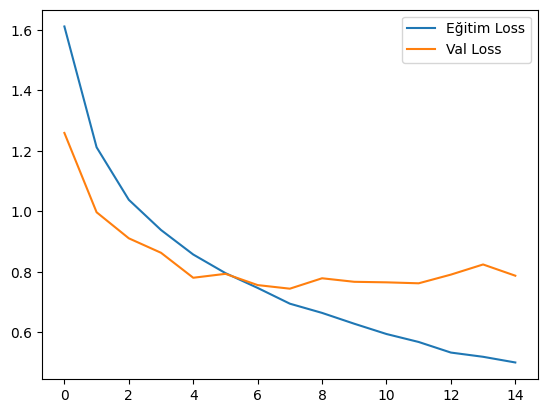

In [57]:
# Test ve Validation kayıpları görselleştirildi

plt.figure()
plt.plot(hist.history["loss"], label="Eğitim Loss")
plt.plot(hist.history["val_loss"], label="Val Loss")
plt.legend()
plt.show()

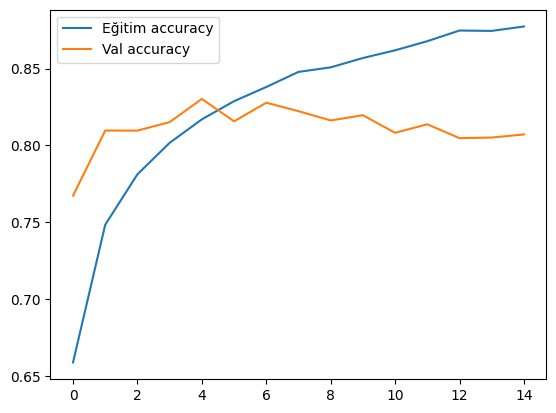

In [58]:
plt.figure()
plt.plot(hist.history["precision_2"], label="Eğitim accuracy")
plt.plot(hist.history["val_precision_2"], label="Val accuracy")
plt.legend()
plt.show()

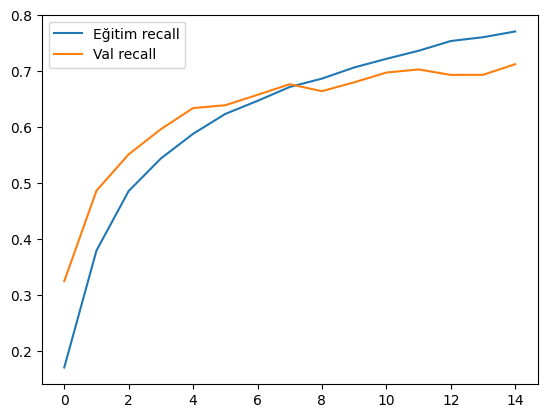

In [59]:
plt.plot(hist.history["recall_2"], label="Eğitim recall")
plt.plot(hist.history["val_recall_2"], label="Val recall")
plt.legend()
plt.show()

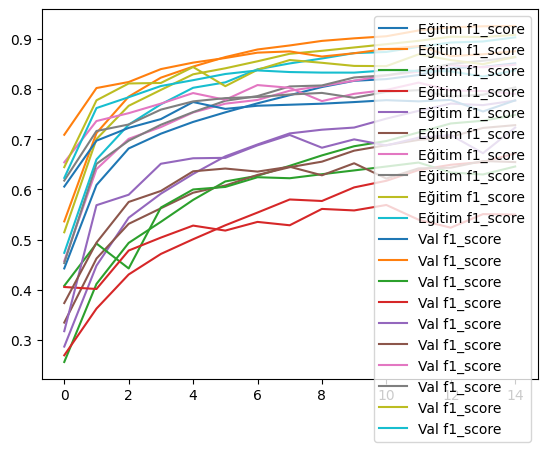

In [60]:
plt.plot(hist.history["f1_score"], label="Eğitim f1_score")
plt.plot(hist.history["val_f1_score"], label="Val f1_score")
plt.legend()
plt.show()

313/313 [==============================] - 3s 11ms/step


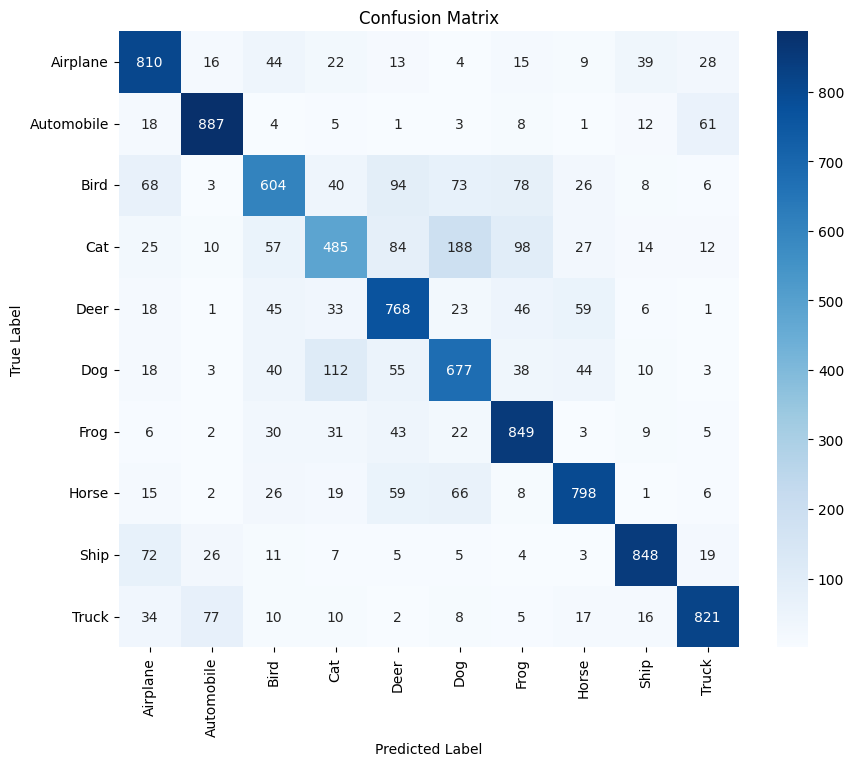

In [63]:

from sklearn.metrics import confusion_matrix

# CIFAR-10 sınıf isimleri
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Tahminleri alın
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Confusion matrix görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


313/313 [==============================] - 2s 7ms/step


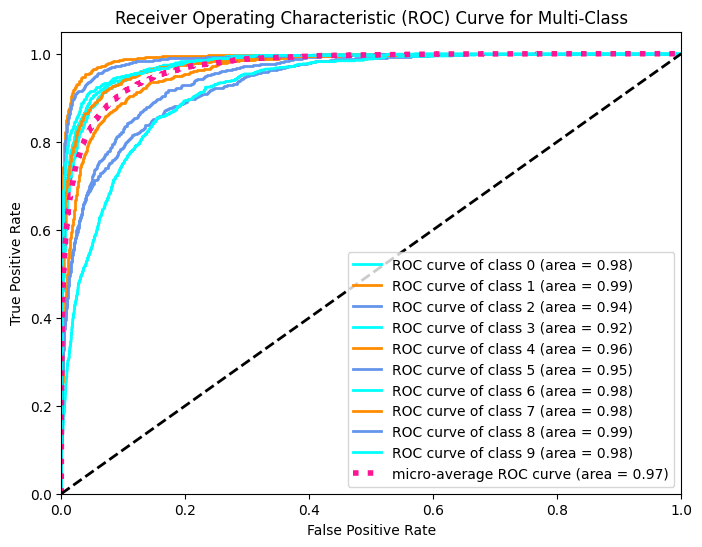

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle



# Tahmin olasılıklarını alındı
y_pred_proba = model.predict(X_test)


n_classes = y_pred_proba.shape[1]
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure(figsize=(8, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label=f'micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()
